<a href="https://colab.research.google.com/github/IgnacioConsoli/TP_ANALISIS_DATOS/blob/main/TP_CODIGO_CONSOLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
                                                                                                ### DATOS CRUDOS ###

In [8]:
df_19 = pd.read_csv("/content/drive/MyDrive/2019_informe_ministerio.csv",sep=';', engine='python')
df_19.head()

,Fecha,Hora UTC,Clase de vuelos (todos los vuelos),Clasificacion Vuelo,Tipo Movimiento,Aeropuerto,Origen/Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad del dato
0,1/1/2019,00:01:00,REGULAR,Doméstico,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,88,44,DEFINITIVO
1,1/1/2019,00:01:00,REGULAR,Internacional,Aterrizaje,EZE,SBGL,TRANSPORTES AEREOS DEL MERCOSUR,NaN,165,165,DEFINITIVO
2,1/1/2019,00:03:00,REGULAR,Doméstico,Aterrizaje,AER,SIS,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR S.A,EMB-ERJ190100IGW,22,11,DEFINITIVO
3,1/1/2019,00:04:00,REGULAR,Internacional,Aterrizaje,EZE,SBGR,TRANSPORTES AEREOS DEL MERCOSUR,NaN,69,69,DEFINITIVO
4,1/1/2019,00:06:00,REGULAR,Internacional,Aterrizaje,AER,SBGR,LAN ARGENTINA S.A. (LATAM AIRLINES),AIB-A-320-233,53,53,DEFINITIVO


In [9]:
df_24 = pd.read_csv("/content/drive/MyDrive/AAA2024-informe-ministerio_actualizado-dic_final.csv", sep=';', engine='python')
df_24.head()

,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad dato
0,01/01/2024,0:02,Regular,Internacional,Aterrizaje,AER,SBGR,LATAM AIRLINES BRASIL (exTAM LA SA),0,145,145,DEFINITIVO
1,01/01/2024,0:02,Regular,Internacional,Aterrizaje,EZE,LFPG,AIR FRANCE,0,217,217,DEFINITIVO
2,01/01/2024,0:05,Regular,Internacional,Aterrizaje,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,168,168,DEFINITIVO
3,01/01/2024,0:08,Regular,Internacional,Despegue,EZE,KJFK,AMERICAN AIRLINES INC.,0,272,272,DEFINITIVO
4,01/01/2024,0:10,Regular,Internacional,Despegue,AER,SCEL,LATAM AIRLINES GROUP S.A.(exLAN AIRLINE),0,92,92,DEFINITIVO


In [10]:
                                                                                        ### LIMPIEZA DE DATOS 2024 ###

In [11]:
#RENOMBRE COLUMNAS

In [12]:
df_24 = df_24.rename(columns={"Fecha UTC": "Fecha"})

In [13]:
df_24 = df_24.rename(columns={"Hora UTC": "Hora"})

In [14]:
df_24 = df_24.rename(columns={"Clase de Vuelo (todos los vuelos)": "Clase_Vuelo"})

In [15]:
df_24 = df_24.rename(columns={"Tipo de Movimiento": "Tipo_Movimiento"})

In [16]:
df_24 = df_24.rename(columns={"Clasificación Vuelo": "Clasificacion"})

In [17]:
df_24 = df_24.rename(columns={"Origen / Destino": "Origen/Destino"})

In [18]:
df_24 = df_24.rename(columns={"Aerolinea Nombre": "Aerolinea"})

In [19]:
df_24 = df_24.rename(columns={"Calidad dato": "Calidad"})

In [20]:
#SAQUE LOS ESPACIOS DE LAS COLUMNAS CON TEXTO

In [21]:
df_24["Clasificacion"] = df_24["Clasificacion"].str.strip()

In [22]:
df_24["Tipo_Movimiento"] = df_24["Tipo_Movimiento"].str.strip()

In [23]:
df_24["Clase_Vuelo"] = df_24["Clase_Vuelo"].str.strip()

In [24]:
df_24["Aeropuerto"] = df_24["Aeropuerto"].str.strip()

In [25]:
df_24["Origen/Destino"] = df_24["Origen/Destino"].str.strip()

In [26]:
#pase a datatime la fecha

In [27]:
df_24["Fecha"] = pd.to_datetime(df_24["Fecha"], format='%d/%m/%Y')


In [28]:
#ELIMINE COLUMNAS Q NO NECESITABA


In [29]:
df_24.head()

,Fecha,Hora,Clase_Vuelo,Clasificacion,Tipo_Movimiento,Aeropuerto,Origen/Destino,Aerolinea,Aeronave,Pasajeros,PAX,Calidad
0,2024-01-01,0:02,Regular,Internacional,Aterrizaje,AER,SBGR,LATAM AIRLINES BRASIL (exTAM LA SA),0,145,145,DEFINITIVO
1,2024-01-01,0:02,Regular,Internacional,Aterrizaje,EZE,LFPG,AIR FRANCE,0,217,217,DEFINITIVO
2,2024-01-01,0:05,Regular,Internacional,Aterrizaje,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,168,168,DEFINITIVO
3,2024-01-01,0:08,Regular,Internacional,Despegue,EZE,KJFK,AMERICAN AIRLINES INC.,0,272,272,DEFINITIVO
4,2024-01-01,0:10,Regular,Internacional,Despegue,AER,SCEL,LATAM AIRLINES GROUP S.A.(exLAN AIRLINE),0,92,92,DEFINITIVO


In [30]:
df_24 = df_24.drop(["Hora", "Aerolinea", "Aeronave", "PAX", "Calidad"], axis= 1)
df_24

,Fecha,Clase_Vuelo,Clasificacion,Tipo_Movimiento,Aeropuerto,Origen/Destino,Pasajeros
0,2024-01-01,Regular,Internacional,Aterrizaje,AER,SBGR,145
1,2024-01-01,Regular,Internacional,Aterrizaje,EZE,LFPG,217
2,2024-01-01,Regular,Internacional,Aterrizaje,EZE,LEMD,168
3,2024-01-01,Regular,Internacional,Despegue,EZE,KJFK,272
4,2024-01-01,Regular,Internacional,Despegue,AER,SCEL,92
...,...,...,...,...,...,...,...
578597,2024-12-31,Regular,Doméstico,Aterrizaje,CBA,AER,87
578598,2024-12-31,Regular,Doméstico,Aterrizaje,NEU,SAL,143
578599,2024-12-31,Regular,Doméstico,Aterrizaje,EZE,USU,123
578600,2024-12-31,Regular,Internacional,Despegue,DOZ,SCEL,173


In [31]:
#agregue una columna

In [32]:
df_24["Mes"] = df_24["Fecha"].dt.month

In [33]:
                                                                                                        ### LIMPIEZA DE DATOS 2019 ###

In [34]:
#pase la fecha a datetime

In [35]:
df_19["Fecha"] = pd.to_datetime(df_19["Fecha"], format='%d/%m/%Y')
df_19.head()

,Fecha,Hora UTC,Clase de vuelos (todos los vuelos),Clasificacion Vuelo,Tipo Movimiento,Aeropuerto,Origen/Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad del dato
0,2019-01-01,00:01:00,REGULAR,Doméstico,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,88,44,DEFINITIVO
1,2019-01-01,00:01:00,REGULAR,Internacional,Aterrizaje,EZE,SBGL,TRANSPORTES AEREOS DEL MERCOSUR,NaN,165,165,DEFINITIVO
2,2019-01-01,00:03:00,REGULAR,Doméstico,Aterrizaje,AER,SIS,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR S.A,EMB-ERJ190100IGW,22,11,DEFINITIVO
3,2019-01-01,00:04:00,REGULAR,Internacional,Aterrizaje,EZE,SBGR,TRANSPORTES AEREOS DEL MERCOSUR,NaN,69,69,DEFINITIVO
4,2019-01-01,00:06:00,REGULAR,Internacional,Aterrizaje,AER,SBGR,LAN ARGENTINA S.A. (LATAM AIRLINES),AIB-A-320-233,53,53,DEFINITIVO


In [36]:
#renombre columnas

In [37]:
df_19 = df_19.rename(columns={"Clase de vuelos (todos los vuelos)": "Clase_Vuelo"})


In [38]:
df_19 = df_19.rename(columns={"Clasificacion Vuelo": "Clasificacion"})

In [39]:
df_19 = df_19.rename(columns={"Tipo Movimiento": "Tipo_Movimiento"})

In [40]:
df_19 = df_19.rename(columns={"Clase de vuelos (todos los vuelos)": "Clase_Vuelo"})

In [41]:
#BORRE COLUMNAS Q NO NECESAITABA

In [42]:
df_19 = df_19.drop(["Hora UTC", "Aerolinea Nombre", "Aeronave", "PAX", "Calidad del dato"], axis= 1)

In [43]:
df_19.head()

,Fecha,Clase_Vuelo,Clasificacion,Tipo_Movimiento,Aeropuerto,Origen/Destino,Pasajeros
0,2019-01-01,REGULAR,Doméstico,Aterrizaje,EZE,SAL,88
1,2019-01-01,REGULAR,Internacional,Aterrizaje,EZE,SBGL,165
2,2019-01-01,REGULAR,Doméstico,Aterrizaje,AER,SIS,22
3,2019-01-01,REGULAR,Internacional,Aterrizaje,EZE,SBGR,69
4,2019-01-01,REGULAR,Internacional,Aterrizaje,AER,SBGR,53


In [44]:
#SAQUE LOS ESPACIOS DE LAS COLUMNAS CON TEXTO

In [45]:
df_19["Clase_Vuelo"] = df_19["Clase_Vuelo"].str.strip()

In [46]:
df_19["Clasificacion"] = df_19["Clasificacion"].str.strip()

In [47]:
df_19["Tipo_Movimiento"] = df_19["Tipo_Movimiento"].str.strip()

In [48]:
df_19["Aeropuerto"] = df_19["Aeropuerto"].str.strip()

In [49]:
df_19["Origen/Destino"] = df_19["Origen/Destino"].str.strip()

In [50]:
#borre datos nulos

In [51]:
df_19.isnull().sum()

,0
Fecha,0
Clase_Vuelo,0
Clasificacion,0
Tipo_Movimiento,3
Aeropuerto,0
Origen/Destino,3
Pasajeros,0


In [52]:
df_19[df_19['Tipo_Movimiento'].isna()]


,Fecha,Clase_Vuelo,Clasificacion,Tipo_Movimiento,Aeropuerto,Origen/Destino,Pasajeros
110721,2019-03-08,VUELOS PRIVADOS NACIONALES,Doméstico,NaN,AER,NaN,0
388994,2019-08-30,VUELOS ESCUELA,Doméstico,NaN,ROS,NaN,0
564141,2019-12-19,VUELOS ESCUELA,Doméstico,NaN,MOR,NaN,0


In [53]:
df_19 = df_19.dropna(subset=['Tipo_Movimiento', 'Origen/Destino'])



In [54]:
#agregue una columna

In [55]:
df_19["Mes"] = df_19["Fecha"].dt.month


/tmp/ipython-input-55-453348536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19["Mes"] = df_19["Fecha"].dt.month


In [56]:
                                                                                                ### FIN DE LA LIMPIEZA ###

#**¿EN QUE AÑO SE VIAJO MAS?**#

In [57]:
pasajeros_2019 = df_19["Pasajeros"].sum()


In [58]:
pasajeros_2024 = df_24["Pasajeros"].sum()

In [59]:
datos_comparacion = pd.DataFrame({
    "Año": ["2019", "2024"],
    "Pasajeros": [pasajeros_2019, pasajeros_2024]
})

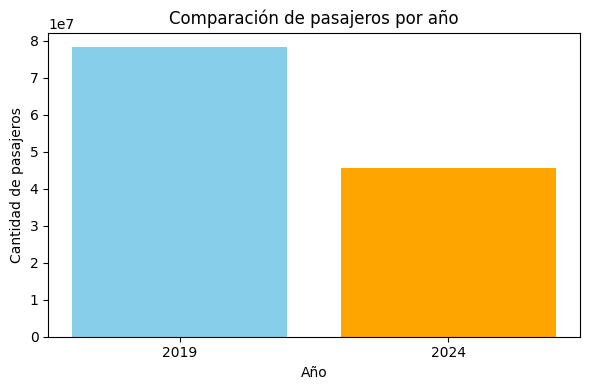

In [60]:
plt.figure(figsize=(6,4))
plt.bar(datos_comparacion["Año"], datos_comparacion["Pasajeros"], color=["skyblue", "orange"])
plt.title("Comparación de pasajeros por año")
plt.ylabel("Cantidad de pasajeros")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

#**¿EN QUE MES DE 2019 SE VIAJO MAS?**


In [61]:
pasaj_mes = df_19.groupby("Mes")["Pasajeros"].sum()
pasaj_mes

,Pasajeros
Mes,
1,6992498
2,6281853
3,6710579
4,6000012
5,6037299
6,5901919
7,7341045
8,7043868
9,6487007


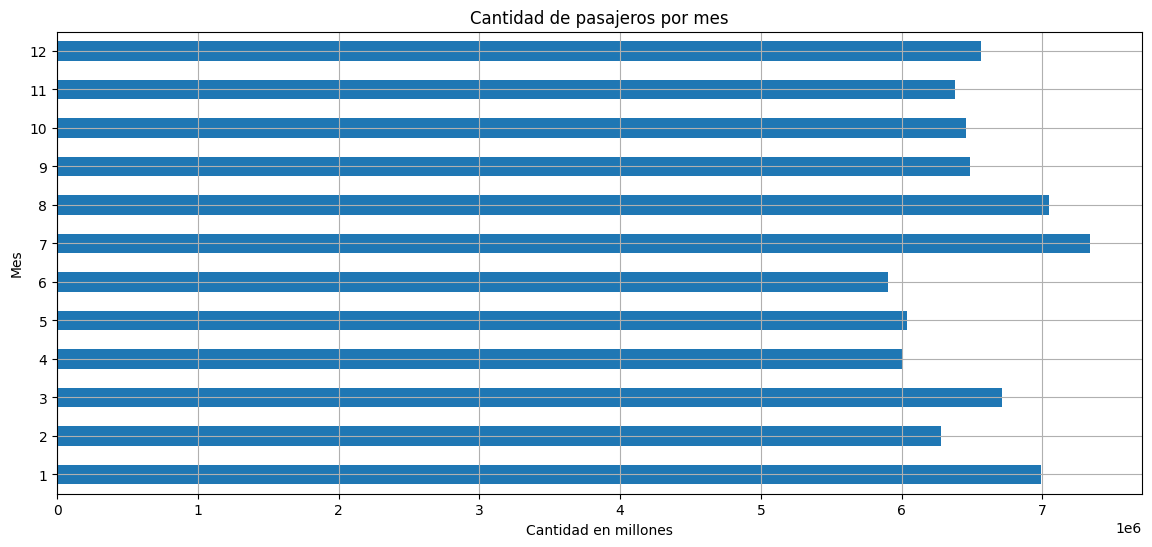

In [62]:
plt.figure(figsize=(14, 6))
pasaj_mes.plot(kind = "barh")
plt.title("Cantidad de pasajeros por mes")
plt.xlabel("Cantidad en millones")
plt.ylabel("Mes")
plt.grid()
plt.show()

#**¿Y EN 2024?**

In [63]:
pasaj_mes24 = df_24.groupby("Mes")["Pasajeros"].sum()
pasaj_mes24

,Pasajeros
Mes,
1,4102241
2,3772501
3,3928388
4,3374943
5,3092488
6,3201762
7,4053016
8,3837719
9,3647603


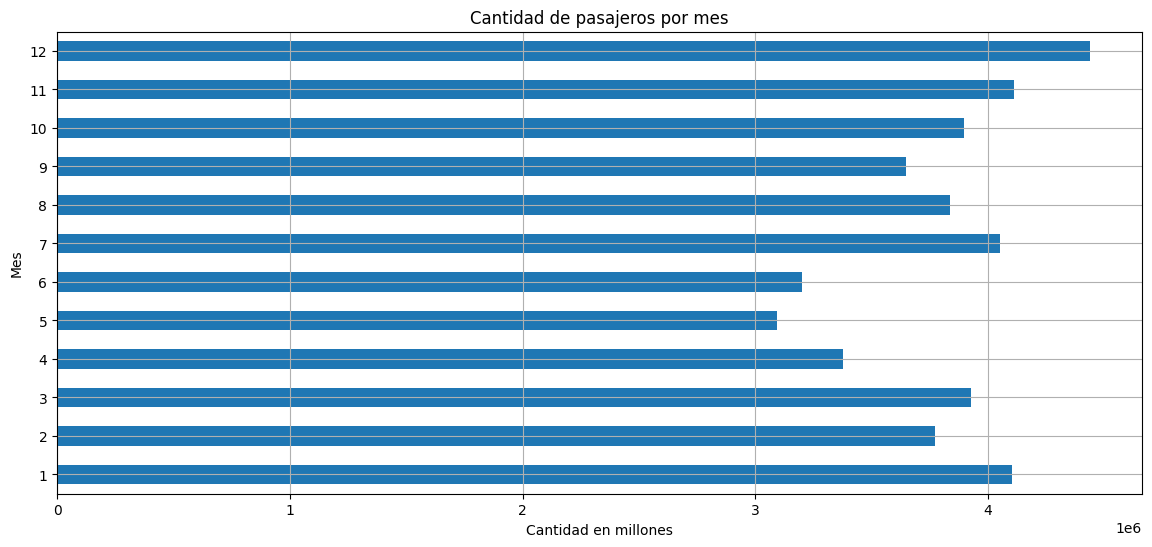

In [64]:
plt.figure(figsize=(14, 6))
pasaj_mes24.plot(kind = "barh")
plt.title("Cantidad de pasajeros por mes")
plt.xlabel("Cantidad en millones")
plt.ylabel("Mes")
plt.grid()
plt.show()

#**¿CUAL FUE EL DESTINO INTERNACIONAL MAS VISITADO EN 2019?**

In [65]:
df_19.head()

,Fecha,Clase_Vuelo,Clasificacion,Tipo_Movimiento,Aeropuerto,Origen/Destino,Pasajeros,Mes
0,2019-01-01,REGULAR,Doméstico,Aterrizaje,EZE,SAL,88,1
1,2019-01-01,REGULAR,Internacional,Aterrizaje,EZE,SBGL,165,1
2,2019-01-01,REGULAR,Doméstico,Aterrizaje,AER,SIS,22,1
3,2019-01-01,REGULAR,Internacional,Aterrizaje,EZE,SBGR,69,1
4,2019-01-01,REGULAR,Internacional,Aterrizaje,AER,SBGR,53,1


In [66]:
aterrizaje_int = df_19[(df_19["Tipo_Movimiento"] == "Aterrizaje") & (df_19["Clasificacion"] == "Internacional")]


In [67]:
destinos = aterrizaje_int.groupby("Origen/Destino")["Pasajeros"].sum().sort_values(ascending=False)
destinos

,Pasajeros
Origen/Destino,
SCEL,1082938
SBGR,978628
SPJC,572063
SBGL,501748
LEMD,464842
...,...
KAUS,0
GVNP,0
FNLU,0


In [68]:
siglas_a_nombres = {
    "SCEL": "Santiago de Chile",
    "SBGR": "São Paulo (Guarulhos)",
    "SPJC": "Lima (Jorge Chávez)",
    "SBGL": "Río de Janeiro",
    "LEMD": "Madrid (Barajas)"
}

In [69]:
top5 = destinos.head(5)
top5.index = top5.index.map(siglas_a_nombres)

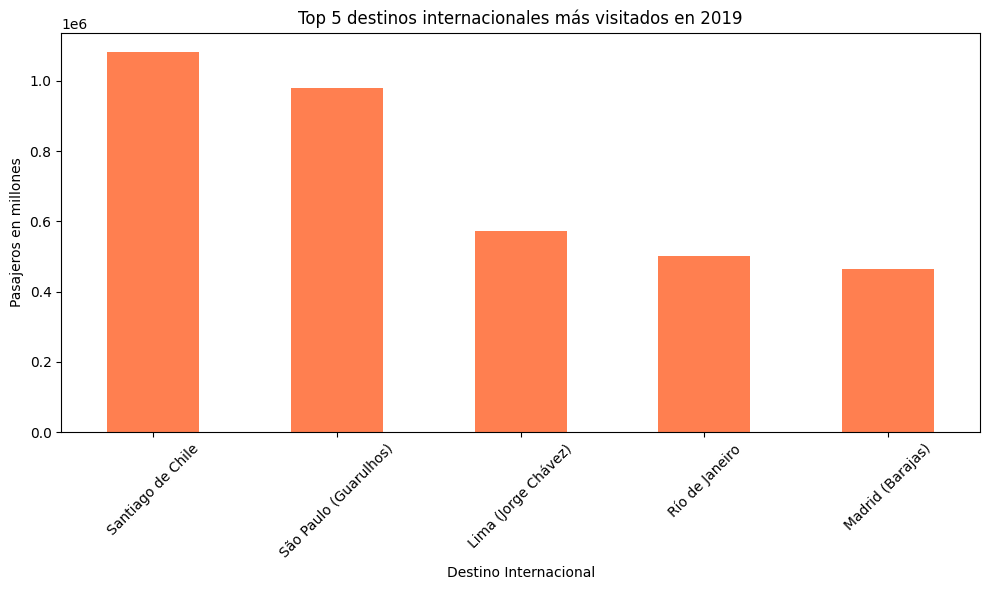

In [70]:
top5.plot(kind="bar", figsize=(10,6), color="coral")
plt.title("Top 5 destinos internacionales más visitados en 2019")
plt.xlabel("Destino Internacional")
plt.ylabel("Pasajeros en millones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**¿Y EN 2024?**

In [71]:
aterrizajes_int24 = df_24[(df_24["Clasificacion"] == "Internacional") & (df_24["Tipo_Movimiento"] == "Aterrizaje")]


In [72]:
destinos24 = aterrizajes_int24.groupby("Origen/Destino")["Pasajeros"].sum().sort_values(ascending=False)
destinos24

,Pasajeros
Origen/Destino,
SCEL,1051009
SBGR,987971
SBGL,628353
LEMD,547005
SPJC,451961
...,...
2356,0
2368,0
2361,0


In [73]:
siglas_a_nombres = {
    "SCEL": "Santiago de Chile",
    "SBGR": "São Paulo (Guarulhos)",
    "SPJC": "Lima (Jorge Chávez)",
    "SBGL": "Río de Janeiro",
    "LEMD": "Madrid (Barajas)"
}

In [74]:
top524 = destinos24.head(5)
top524.index = top524.index.map(siglas_a_nombres)

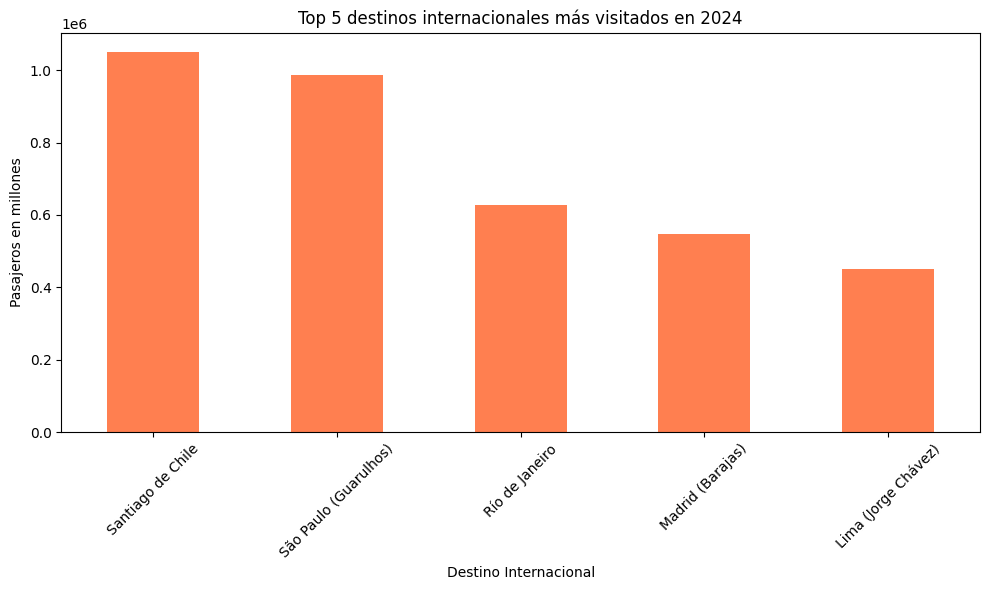

In [75]:
top524.plot(kind="bar", figsize=(10,6), color="coral")
plt.title("Top 5 destinos internacionales más visitados en 2024")
plt.xlabel("Destino Internacional")
plt.ylabel("Pasajeros en millones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**¿CUAL FUE EL DESTINO NACIONAL MAS VISITADO EN 2019?**


In [76]:
df_19.head()

,Fecha,Clase_Vuelo,Clasificacion,Tipo_Movimiento,Aeropuerto,Origen/Destino,Pasajeros,Mes
0,2019-01-01,REGULAR,Doméstico,Aterrizaje,EZE,SAL,88,1
1,2019-01-01,REGULAR,Internacional,Aterrizaje,EZE,SBGL,165,1
2,2019-01-01,REGULAR,Doméstico,Aterrizaje,AER,SIS,22,1
3,2019-01-01,REGULAR,Internacional,Aterrizaje,EZE,SBGR,69,1
4,2019-01-01,REGULAR,Internacional,Aterrizaje,AER,SBGR,53,1


In [77]:
aterrizaje_nac = df_19[(df_19["Tipo_Movimiento"] == "Aterrizaje") & (df_19["Clasificacion"] == "Doméstico")]


In [78]:
destinos_nac = aterrizaje_nac.groupby("Origen/Destino")["Pasajeros"].sum().sort_values(ascending=False)
destinos_nac.head(10)

,Pasajeros
Origen/Destino,
AER,11513264
CBA,2704936
BAR,1780404
DOZ,1745752
PAL,1514402
IGU,1485764
SAL,1392188
NEU,1173872
EZE,1065418


In [79]:
siglas_a_nombres_nac = {
    "AER": "Aeroparque",
    "CBA": "Cordoba",
    "PAL": "El Palomar",
    "BAR": "Bariloche",
    "DOZ": "Mendoza",
    "EZE": "Ezeiza"
}

In [80]:
top5_nac = destinos_nac.head(5)
top5_nac.index = top5_nac.index.map(siglas_a_nombres_nac)

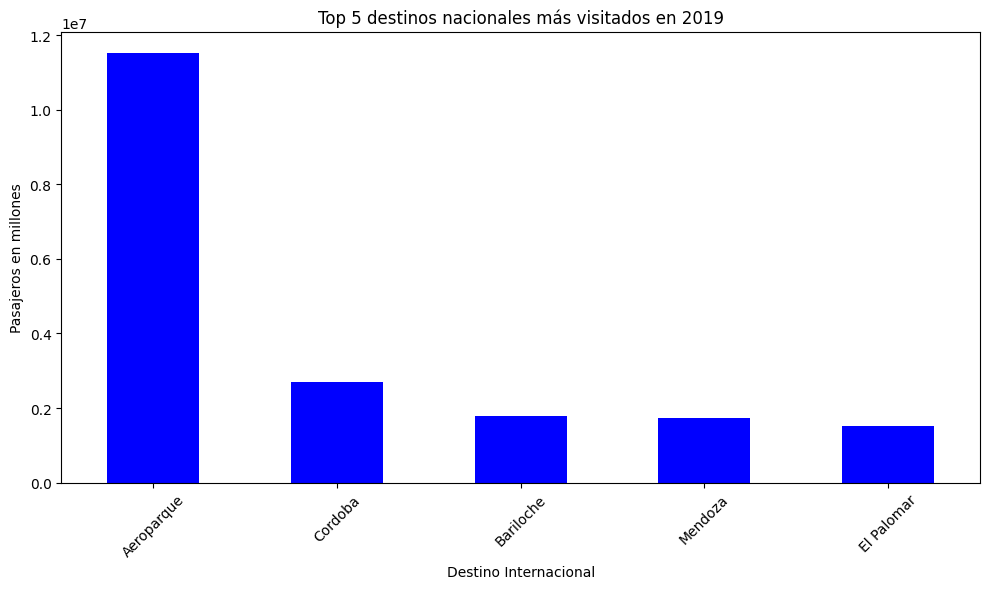

In [81]:
top5_nac.plot(kind="bar", figsize=(10,6), color="blue")
plt.title("Top 5 destinos nacionales más visitados en 2019")
plt.xlabel("Destino Internacional")
plt.ylabel("Pasajeros en millones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**¿Y en 2024?**

In [82]:
df_24.head()

,Fecha,Clase_Vuelo,Clasificacion,Tipo_Movimiento,Aeropuerto,Origen/Destino,Pasajeros,Mes
0,2024-01-01,Regular,Internacional,Aterrizaje,AER,SBGR,145,1
1,2024-01-01,Regular,Internacional,Aterrizaje,EZE,LFPG,217,1
2,2024-01-01,Regular,Internacional,Aterrizaje,EZE,LEMD,168,1
3,2024-01-01,Regular,Internacional,Despegue,EZE,KJFK,272,1
4,2024-01-01,Regular,Internacional,Despegue,AER,SCEL,92,1


In [83]:
aterrizajes_nac24 = df_24[(df_24["Clasificacion"] == "Doméstico") & (df_24["Tipo_Movimiento"] == "Aterrizaje")]

In [84]:
destinos24_nac = aterrizajes_nac24.groupby("Origen/Destino")["Pasajeros"].sum().sort_values(ascending=False)
destinos24_nac

,Pasajeros
Origen/Destino,
AER,5533988
EZE,1508934
CBA,1130807
BAR,1129967
DOZ,849100
...,...
URO,0
VDP,0
VDR,0


In [85]:
top5_nac24 = destinos24_nac.head(5)
top5_nac24.index = top5_nac24.index.map(siglas_a_nombres_nac)

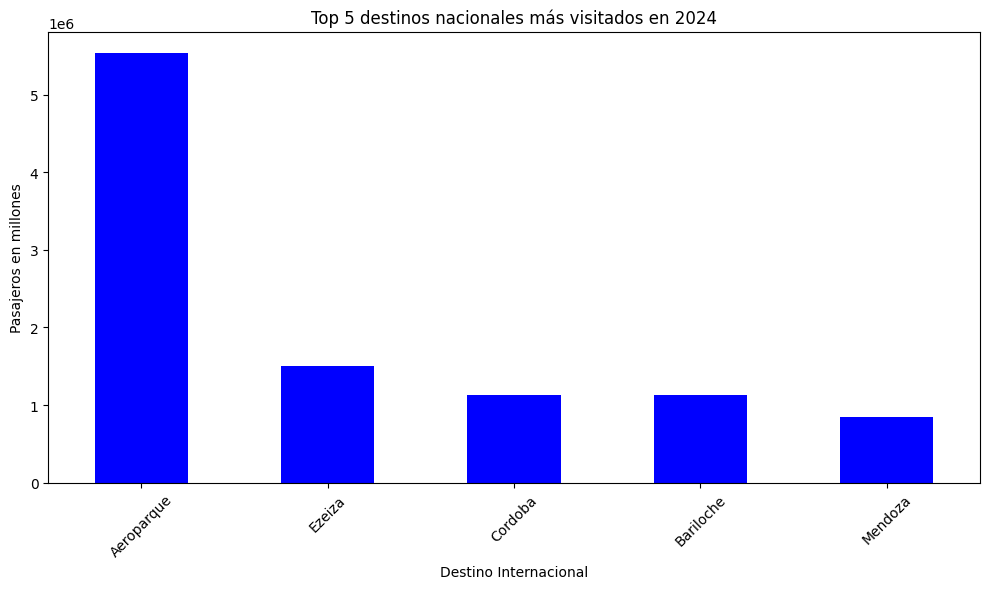

In [86]:
top5_nac24.plot(kind="bar", figsize=(10,6), color="blue")
plt.title("Top 5 destinos nacionales más visitados en 2024")
plt.xlabel("Destino Internacional")
plt.ylabel("Pasajeros en millones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()